In [22]:
# Add relevant Jupyter notebook extensions 
import os
print(os.getcwd())

/Users/francescobalanzoni/Documents/Python/MEng/b1-coding-practical-mt/b1-coding-practical-mt24/notebooks


In [23]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/francescobalanzoni/Documents/Python/MEng/b1-coding-practical-mt/b1-coding-practical-mt24', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/francescobalanzoni/.venvs/b1-coding-practical-mt24/lib/python3.12/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

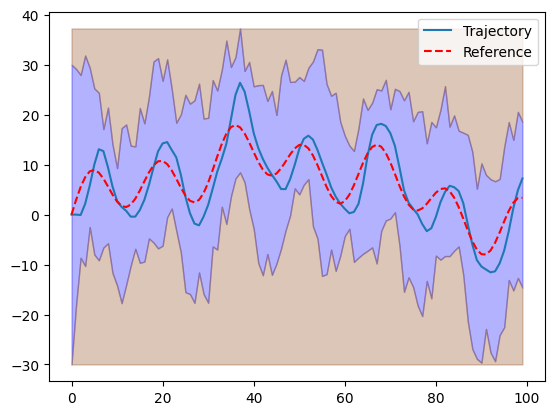

In [32]:
# Import relevant modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import Controller

controller = Controller()
sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

Testing with Kp = 0.00, Kd = 0.00
Testing with Kp = 0.00, Kd = 0.33
Testing with Kp = 0.00, Kd = 0.67
Testing with Kp = 0.00, Kd = 1.00
Testing with Kp = 0.33, Kd = 0.00
Testing with Kp = 0.33, Kd = 0.33
Testing with Kp = 0.33, Kd = 0.67
Testing with Kp = 0.33, Kd = 1.00
Testing with Kp = 0.67, Kd = 0.00
Testing with Kp = 0.67, Kd = 0.33
Testing with Kp = 0.67, Kd = 0.67
Testing with Kp = 0.67, Kd = 1.00
Testing with Kp = 1.00, Kd = 0.00
Testing with Kp = 1.00, Kd = 0.33
Testing with Kp = 1.00, Kd = 0.67
Testing with Kp = 1.00, Kd = 1.00

Best Kp: 0.00, Best Kd: 1.00, Minimum Cost (MSE): 11.8280


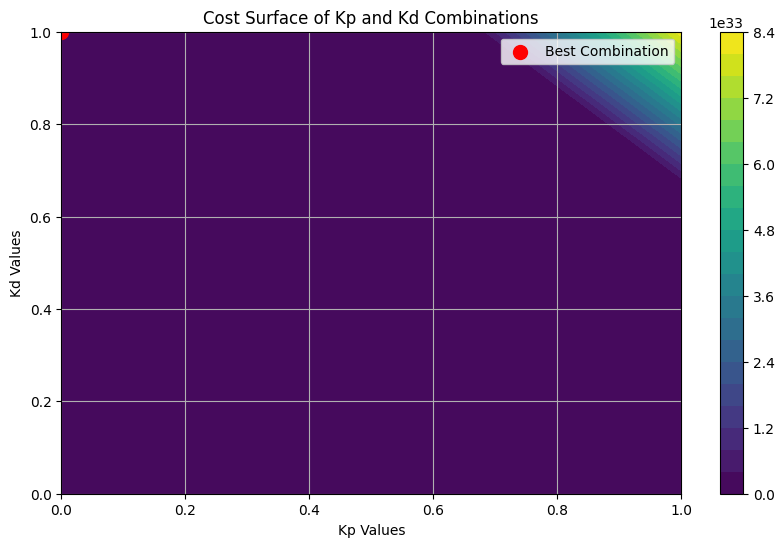

Simulating with the best controller for detailed plotting...


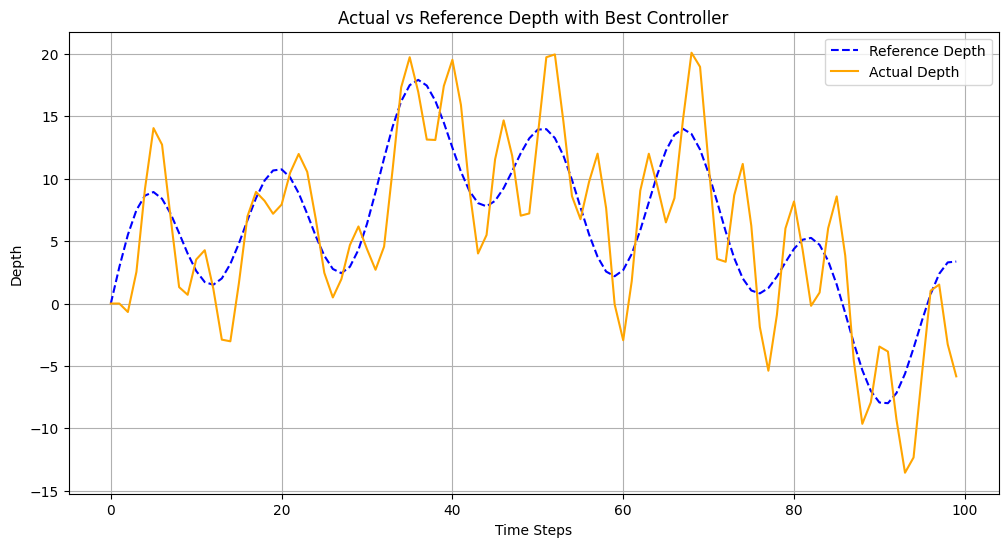

In [37]:
# Ensure you have the necessary imports
import numpy as np
import matplotlib.pyplot as plt

# Create a function to test the PD controller with specified gains
def test_pd_controller(kp: float, kd: float, mission: Mission):
    # Instantiate the submarine
    sub = Submarine()
    
    # Create a PD controller with specified gains
    controller = Controller(kp=kp, kd=kd)

    # Instantiate the closed loop system
    closed_loop = ClosedLoop(sub, controller)

    # Simulate the trajectory with random disturbances
    trajectory = closed_loop.simulate_with_random_disturbances(mission)

    # Calculate the cost (e.g., mean squared error between reference and actual depth)
    actual_depths = trajectory.position[:, 1]  # Assuming y position represents depth
    reference_depths = mission.reference

    # Cost function: Mean Squared Error (MSE)
    cost = np.mean((reference_depths - actual_depths) ** 2)

    return cost, trajectory

# Generate Kp and Kd values between 0 and 1
kp_values = np.linspace(0, 1, 4)  # 4 values for Kp: [0, 0.33, 0.67, 1]
kd_values = np.linspace(0, 1, 4)  # 4 values for Kd: [0, 0.33, 0.67, 1]

# Load the mission data from CSV
mission = Mission.from_csv("mission.csv")  # Ensure your path is correct

# Store results for analysis
results = []

# Test all combinations of Kp and Kd
for kp in kp_values:
    for kd in kd_values:
        print(f"Testing with Kp = {kp:.2f}, Kd = {kd:.2f}")
        cost, trajectory = test_pd_controller(kp, kd, mission)
        results.append((kp, kd, cost))

# Convert results to a NumPy array for easier handling
results = np.array(results)

# Find the combination with the smallest cost
min_cost_index = np.argmin(results[:, 2])  # Index of the smallest cost
best_kp, best_kd, min_cost = results[min_cost_index]

# Print out the best results
print(f"\nBest Kp: {best_kp:.2f}, Best Kd: {best_kd:.2f}, Minimum Cost (MSE): {min_cost:.4f}")

# Plotting costs for each combination of Kp and Kd
Kp_grid, Kd_grid = np.meshgrid(kp_values, kd_values)
costs = results[:, 2].reshape(Kp_grid.shape)

# Create a contour plot to visualize the cost surface
plt.figure(figsize=(10, 6))
contour = plt.contourf(Kp_grid, Kd_grid, costs, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.scatter(best_kp, best_kd, color='red', label='Best Combination', marker='o', s=100)
plt.title('Cost Surface of Kp and Kd Combinations')
plt.xlabel('Kp Values')
plt.ylabel('Kd Values')
plt.legend()
plt.grid()
plt.show()

# Plot the actual vs. reference depth for the best controller
print("Simulating with the best controller for detailed plotting...")
best_cost, best_trajectory = test_pd_controller(best_kp, best_kd, mission)
actual_depths_best = best_trajectory.position[:, 1]
reference_depths_best = mission.reference

# Plotting actual vs reference depth
plt.figure(figsize=(12, 6))
plt.plot(reference_depths_best, label='Reference Depth', color='blue', linestyle='--')
plt.plot(actual_depths_best, label='Actual Depth', color='orange')
plt.title('Actual vs Reference Depth with Best Controller')
plt.xlabel('Time Steps')
plt.ylabel('Depth')
plt.legend()
plt.grid()
plt.show()
